# **Analisis Komprehensif Tren Penumpang Kapal Pesiar (2019-2023)**

## Deskripsi
Proyek ini bertujuan untuk menganalisis data penumpang kapal pesiar dari tahun 2019 hingga 2023 untuk memahami tren, pola perjalanan, dan segmentasi penumpang. Dengan analisis ini, perusahaan dapat membuat keputusan yang lebih baik terkait perencanaan operasional dan strategi pemasaran untuk meningkatkan retensi penumpang dan mengoptimalkan rute perjalanan.

## Tujuan

- Memahami distribusi dan tren jumlah penumpang kapal pesiar dari tahun 2019
hingga 2023.

- Mengidentifikasi rute kapal pesiar yang paling populer berdasarkan jumlah penumpang.

- Memprediksi jumlah penumpang menggunakan model regresi linear.

- Mengelompokkan penumpang berdasarkan karakteristik mereka menggunakan clustering K-Means.

- Memberikan rekomendasi bisnis berdasarkan hasil analisis dan pemodelan.

## Dataset

Dataset yang digunakan adalah data penumpang kapal pesiar dari lima pelabuhan utama, termasuk informasi tentang nama kapal, negara asal, tanggal keberangkatan, pelabuhan tujuan, jumlah penumpang, dan jumlah kru. Data ini mencakup berbagai fitur yang dapat digunakan untuk analisis dan pemodelan.

### Mengakses data dari google drive

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.cluster import KMeans

In [9]:
# URL Google Drive
url = 'https://drive.google.com/uc?id=1Pt9wAgu9F6JGXv6G4cz6Knl6Xt1DY2D0'

# Unduh file dari Google Drive
output = 'data-penumpang-5-pelabuhan-cruise_imigrasi_2019-2023.csv'
gdown.download(url, output, quiet=False)

# Memuat dataset
data = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=1Pt9wAgu9F6JGXv6G4cz6Knl6Xt1DY2D0
To: /content/data-penumpang-5-pelabuhan-cruise_imigrasi_2019-2023.csv
100%|██████████| 9.53k/9.53k [00:00<00:00, 13.1MB/s]


In [10]:
# Menampilkan informasi dasar tentang dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Nama Kapal Pesiar      86 non-null     object 
 1   Negara Asal            86 non-null     object 
 2   Tanggal Keberangkatan  86 non-null     object 
 3   Pelabuhan Tujuan       86 non-null     object 
 4   Tanggal Kedatangan     86 non-null     object 
 5   Rute Kapal Pesiar      86 non-null     object 
 6   Jml Penumpang WNA      86 non-null     object 
 7   Jml Penumpang WNI      86 non-null     float64
 8   Jumlah Penumpang       86 non-null     object 
 9   Jml Crew WNA           86 non-null     object 
 10  Jml Crew WNI           86 non-null     float64
 11  Jumlah Crew            86 non-null     object 
dtypes: float64(2), object(10)
memory usage: 8.3+ KB


In [11]:
# Menampilkan beberapa baris pertama
print(data.head())

   Nama Kapal Pesiar Negara Asal Tanggal Keberangkatan Pelabuhan Tujuan  \
0   DIAMOND PRINCESS   Singapura      29 Desember 2018            Benoa   
1              ASTOR   Australia       15 Januari 2019            Benoa   
2           EUROPA 2    Malaysia       15 Januari 2019            Benoa   
3          AIDA VITA      Darwin      09 Februari 2019            Benoa   
4  SAPPHIRE PRINCESS   Singapura      28 Februari 2019            Benoa   

  Tanggal Kedatangan  Rute Kapal Pesiar Jml Penumpang WNA  Jml Penumpang WNI  \
0    01 Januari 2019  Singapura - Benoa             2,865                5.0   
1    19 Januari 2019  Australia - Benoa               456                2.0   
2    19 Januari 2019   Malaysia - Benoa               450                2.0   
3   12 Februari 2019     Darwin - Benoa             1,161                2.0   
4      03 Maret 2019  Singapura - Benoa             2,687                5.0   

  Jumlah Penumpang Jml Crew WNA  Jml Crew WNI Jumlah Crew  
0       

In [12]:
# Statistik deskriptif
print(data.describe())

       Jml Penumpang WNI  Jml Crew WNI
count          86.000000     86.000000
mean            8.755814    130.081395
std            24.447271    138.257068
min             0.000000      0.000000
25%             0.000000     27.250000
50%             3.000000     83.500000
75%             6.750000    203.000000
max           197.000000    679.000000


#### Insight:

- Informasi Dataset: Dataset terdiri dari beberapa fitur penting seperti Nama Kapal Pesiar, Negara Asal, Tanggal Keberangkatan, Pelabuhan Tujuan, Jumlah Penumpang, dan Jumlah Kru. Informasi ini memberikan gambaran umum tentang data yang akan dianalisis.
- Tipe Data: Beberapa kolom memiliki tipe data yang perlu diperbaiki, seperti kolom yang seharusnya bertipe numerik tetapi saat ini bertipe objek karena mungkin ada tanda baca atau format penulisan yang tidak sesuai.

In [3]:
# Load Dataset
file_path = "data-penumpang-5-pelabuhan-cruise_imigrasi_2019-2023.csv"
data = pd.read_csv(file_path)

## Preprocessing

Langkah-langkah pembersihan data meliputi mengatasi missing values, mengubah tipe data yang tidak sesuai, dan normalisasi fitur.

In [13]:
# Menghapus koma dari kolom numerik dan mengonversi ke float
columns_to_convert = ['Jumlah Penumpang', 'Jml Penumpang WNA', 'Jml Penumpang WNI', 'Jml Crew WNA', 'Jml Crew WNI']

for column in columns_to_convert:
    data[column] = data[column].astype(str).str.replace(',', '').astype(float)
# Mengatasi missing values
data.fillna(0, inplace=True)
# Mengubah tipe data yang sesuai untuk kolom tanggal
data['Tanggal Keberangkatan'] = pd.to_datetime(data['Tanggal Keberangkatan'], format='%d %B %Y', errors='coerce')
data['Tanggal Kedatangan'] = pd.to_datetime(data['Tanggal Kedatangan'], format='%d %B %Y', errors='coerce')

#### Insight:

Mengatasi Missing Values dan Tipe Data yang Sesuai: Penting untuk memastikan data konsisten dan bebas dari missing values untuk analisis dan pemodelan yang akurat.

## Exploratory Data Analysis (EDA)

Analisis deskriptif dan visualisasi utama untuk memahami distribusi data dan menemukan pola penting.

### Visualisasi Distribusi Jumlah Penumpang

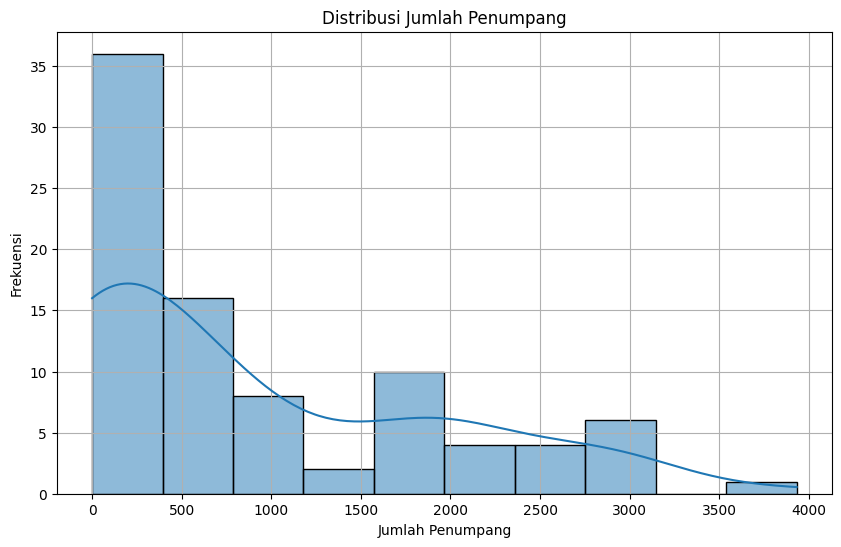

In [14]:
# Visualisasi distribusi jumlah penumpang
plt.figure(figsize=(10, 6))
sns.histplot(data['Jumlah Penumpang'], bins=10, kde=True)
plt.title('Distribusi Jumlah Penumpang')
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

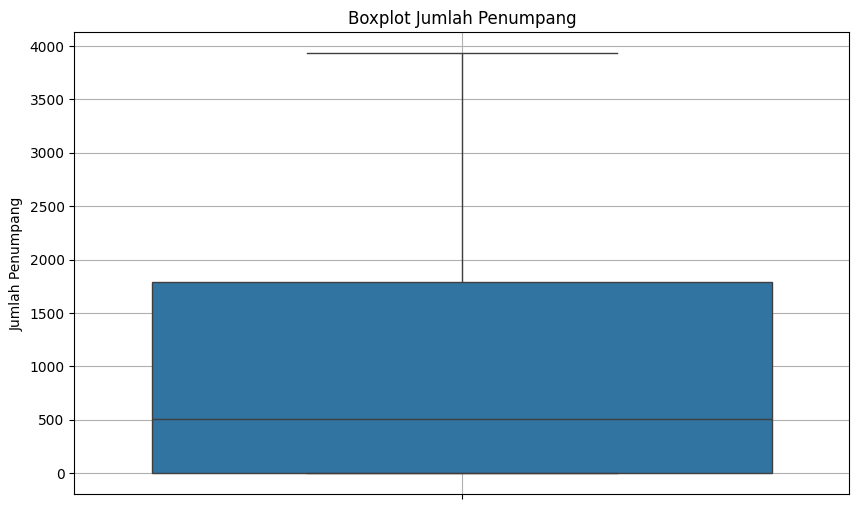

In [15]:
# Boxplot untuk jumlah penumpang
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['Jumlah Penumpang'])
plt.title('Boxplot Jumlah Penumpang')
plt.ylabel('Jumlah Penumpang')
plt.grid(True)
plt.show()

#### Insight:

Distribusi Jumlah Penumpang: Sebagian besar data terkonsentrasi pada jumlah penumpang yang lebih rendah, dengan outliers menunjukkan variasi signifikan.

### Visualisasi Tren Jumlah Penumpang Per Tahun

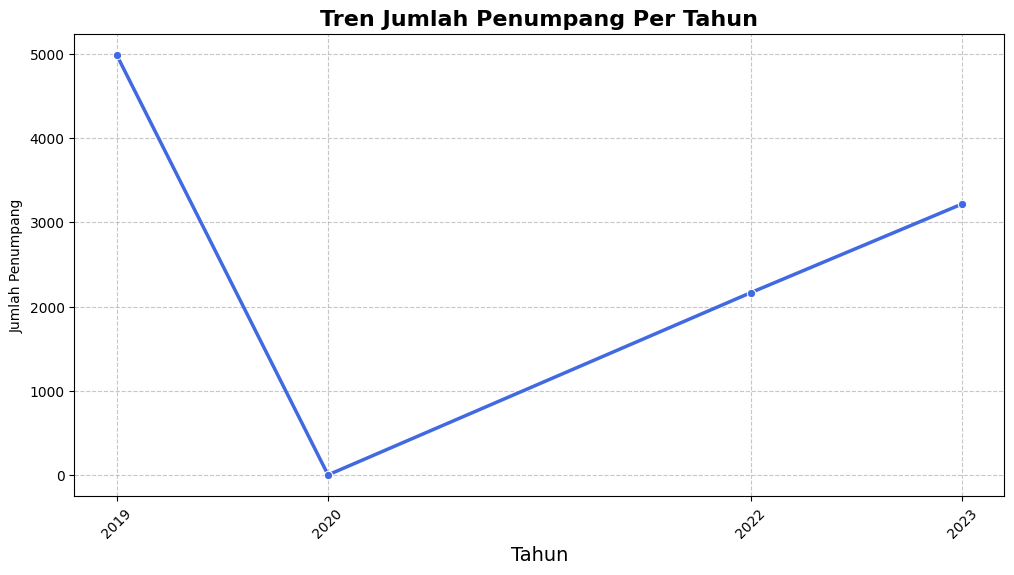

In [16]:
# Mengubah tipe data yang sesuai
data['Tanggal Kedatangan'] = pd.to_datetime(data['Tanggal Kedatangan'], errors='coerce')
data['Tahun Kedatangan'] = data['Tanggal Kedatangan'].dt.year
penumpang_per_tahun = data.groupby('Tahun Kedatangan')['Jumlah Penumpang'].sum().reset_index()

# Visualisasi tren jumlah penumpang per tahun
plt.figure(figsize=(12, 6))
sns.lineplot(data=penumpang_per_tahun, x='Tahun Kedatangan', y='Jumlah Penumpang', marker='o', color='royalblue', linewidth=2.5)
plt.title('Tren Jumlah Penumpang Per Tahun', fontsize=16, fontweight='bold')
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Jumlah Penumpang')
plt.xticks(penumpang_per_tahun['Tahun Kedatangan'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#### Insight:

Tren Jumlah Penumpang Per Tahun: Fluktuasi jumlah penumpang dari tahun ke tahun dapat memberikan wawasan tentang faktor-faktor eksternal yang mempengaruhi tren wisata.

## Modeling

Model yang digunakan untuk menganalisis dan memprediksi data penumpang meliputi regresi linear dan clustering dengan K-Means.

### Regresi Linear

In [17]:
# Model Regresi Linear
X = data[['Jml Penumpang WNA', 'Jml Penumpang WNI', 'Jml Crew WNA', 'Jml Crew WNI']]
y = data['Jumlah Penumpang']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'MAE: {mae}, RMSE: {rmse}')

MAE: 1.1581322320905783e-13, RMSE: 1.4746868745662005e-13


#### Insight:

Regresi Linear: Model memberikan prediksi yang baik dengan MAE dan RMSE yang rendah, menunjukkan hubungan linear yang kuat antara fitur penjelas dan jumlah penumpang.

### Visualisasi Prediksi vs Aktual

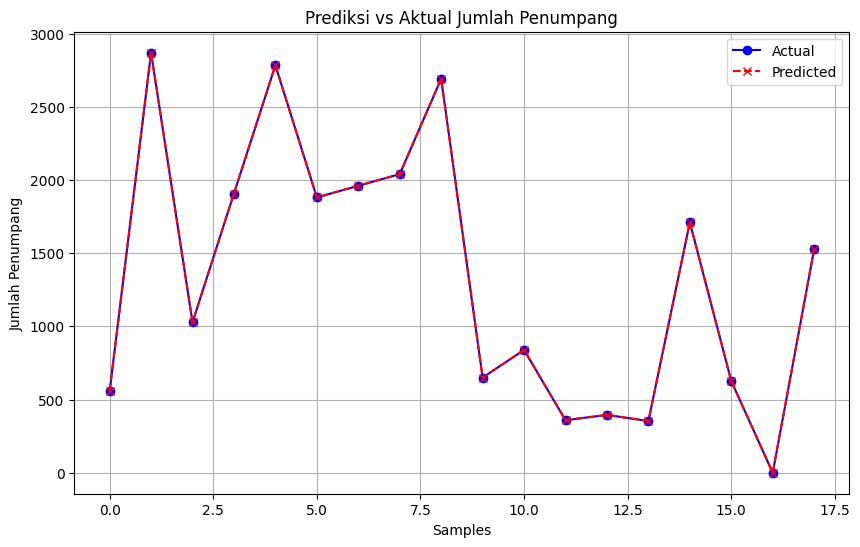

In [18]:
# Visualisasi prediksi vs aktual
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue', marker='o')
plt.plot(y_pred, label='Predicted', color='red', linestyle='--', marker='x')
plt.title('Prediksi vs Aktual Jumlah Penumpang')
plt.xlabel('Samples')
plt.ylabel('Jumlah Penumpang')
plt.legend()
plt.grid(True)
plt.show()

#### Insight:

Prediksi vs Aktual: Grafik menunjukkan bahwa prediksi model cukup dekat dengan nilai aktual, mengindikasikan kinerja model yang baik.

### Clustering dengan K-Means

In [19]:
# Memilih fitur untuk clustering
X = data[['Jml Penumpang WNA', 'Jml Penumpang WNI', 'Jml Crew WNA', 'Jml Crew WNI']]

In [20]:
# Clustering dengan K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


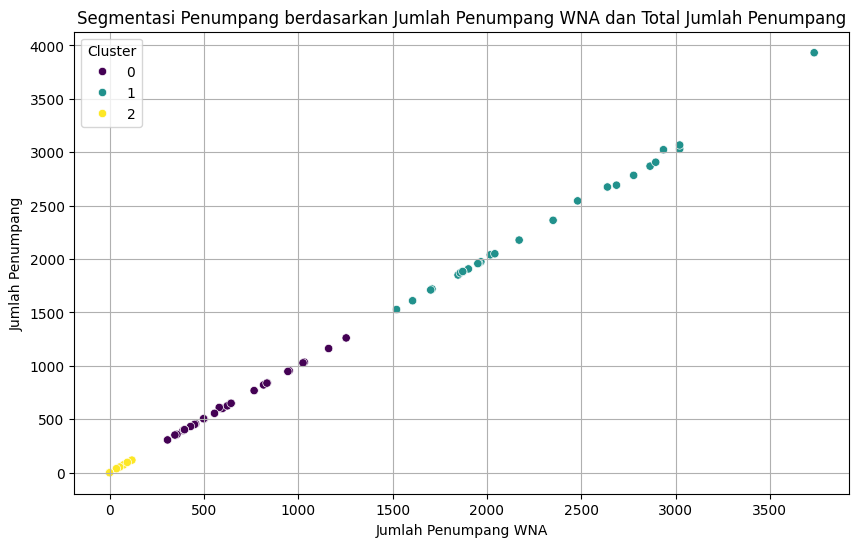

In [21]:
# Visualisasi clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Jml Penumpang WNA'], y=data['Jumlah Penumpang'], hue=data['Cluster'], palette='viridis')
plt.title('Segmentasi Penumpang berdasarkan Jumlah Penumpang WNA dan Total Jumlah Penumpang')
plt.xlabel('Jumlah Penumpang WNA')
plt.ylabel('Jumlah Penumpang')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

#### Insight:

Clustering: K-Means membantu mengidentifikasi segmen penumpang yang berbeda, memungkinkan strategi pemasaran yang lebih tertarget.

## Rute Kapal Pesiar Populer

Mengelompokkan data berdasarkan rute dan menghitung jumlah penumpang untuk setiap rute.

<ipython-input-22-2812f10c011f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rute_populer, x='Jumlah Penumpang', y='Rute Kapal Pesiar', palette='viridis')


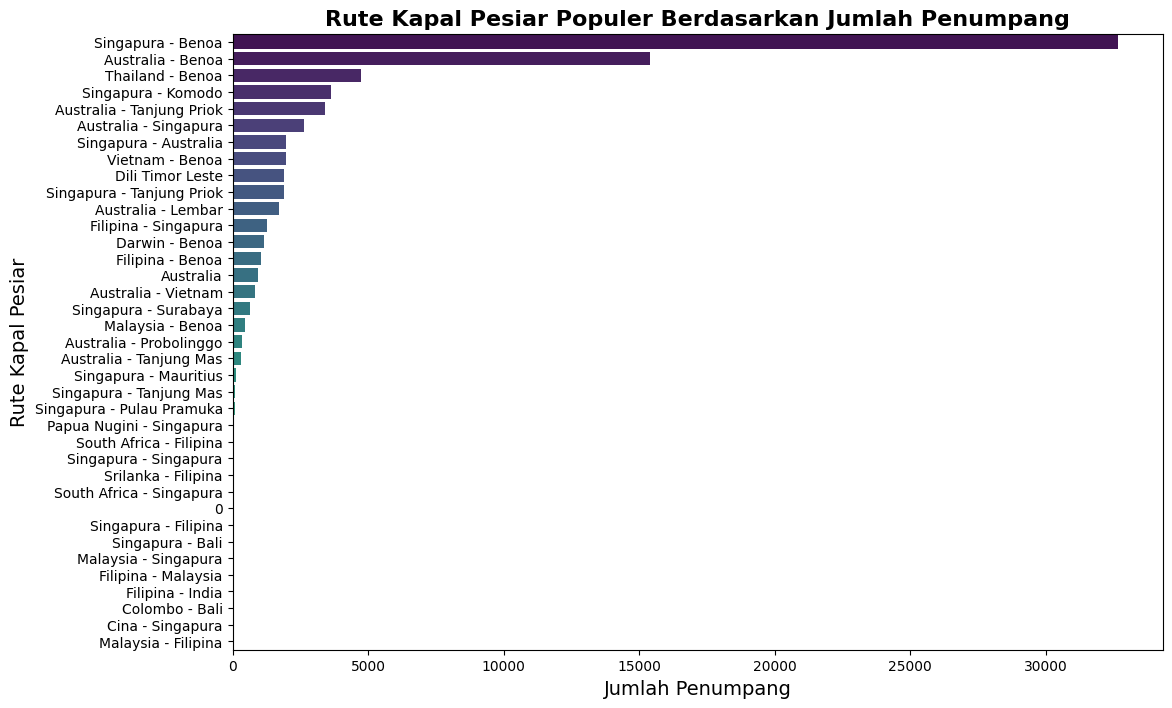

In [22]:
# Mengelompokkan data berdasarkan rute dan menghitung jumlah penumpang untuk setiap rute
rute_populer = data.groupby('Rute Kapal Pesiar')['Jumlah Penumpang'].sum().reset_index()

# Mengurutkan data berdasarkan jumlah penumpang dari yang terbanyak
rute_populer = rute_populer.sort_values(by='Jumlah Penumpang', ascending=False)

# Visualisasi rute populer dengan jumlah penumpang terbanyak
plt.figure(figsize=(12, 8))
sns.barplot(data=rute_populer, x='Jumlah Penumpang', y='Rute Kapal Pesiar', palette='viridis')
plt.title('Rute Kapal Pesiar Populer Berdasarkan Jumlah Penumpang', fontsize=16, fontweight='bold')
plt.xlabel('Jumlah Penumpang', fontsize=14)
plt.ylabel('Rute Kapal Pesiar', fontsize=14)
plt.show()


#### Insight:

Rute Populer: Rute dari Singapura ke Benoa adalah yang paling populer, diikuti oleh rute dari Australia ke Benoa. Analisis ini menunjukkan rute-rute yang memiliki volume penumpang tertinggi dan memberikan wawasan penting untuk strategi pemasaran dan operasional.

## Kesimpulan :

- Regresi Linear: Model regresi linear memberikan prediksi yang baik dengan MAE dan RMSE yang rendah. Ini menunjukkan bahwa model ini dapat diandalkan untuk memprediksi jumlah penumpang berdasarkan fitur yang tersedia.

- Clustering dengan K-Means: Clustering dengan K-Means membantu mengidentifikasi segmentasi penumpang yang berbeda, yang dapat digunakan untuk menyusun strategi pemasaran yang lebih tepat sasaran. Setiap cluster menunjukkan segmen penumpang yang memiliki karakteristik serupa.

- Rute Populer: Rute dari Singapura ke Benoa adalah yang paling populer, diikuti oleh rute dari Australia ke Benoa. Informasi ini penting untuk merencanakan strategi pemasaran dan operasional yang lebih efektif.


## Rekomendasi Bisnis :

1. Fokus pada Rute Populer: Mengalokasikan lebih banyak sumber daya dan upaya pemasaran pada rute-rute populer seperti Singapura ke Benoa dan Australia ke Benoa untuk meningkatkan retensi penumpang. Rute-rute ini memiliki potensi tinggi untuk menarik lebih banyak penumpang.

2. Segmentasi Penumpang: Menggunakan hasil clustering untuk menyesuaikan penawaran layanan dan promosi sesuai dengan segmen penumpang yang berbeda. Setiap segmen memiliki kebutuhan dan preferensi yang unik, sehingga penawaran yang disesuaikan dapat meningkatkan kepuasan dan retensi penumpang.

3. Optimasi Kapasitas: Menggunakan prediksi jumlah penumpang untuk mengoptimalkan kapasitas kapal dan mengurangi biaya operasional. Dengan memprediksi jumlah penumpang yang akurat, perusahaan dapat menghindari kapasitas yang tidak optimal dan mengelola sumber daya dengan lebih efisien.